In [1]:
import pandas as pd
import matplotlib as mpl
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as s

In [2]:
tbl = pd.read_excel("/content/drive/MyDrive/data/dummy.xlsx")
tbl

,servicecall,months_since_last_service,type_of_repair,repair_time_in_hours
0,1,2,electrical,2.9
1,2,6,mechanical,3.0
2,3,8,electrical,4.8
3,4,3,mechanical,1.8
4,5,2,electrical,2.9
5,6,7,electrical,4.9
6,7,9,mechanical,4.2
7,8,8,mechanical,4.8
8,9,4,electrical,4.4
9,10,6,electrical,4.5


Text(0.5, 1.0, ' simple linear regression ')

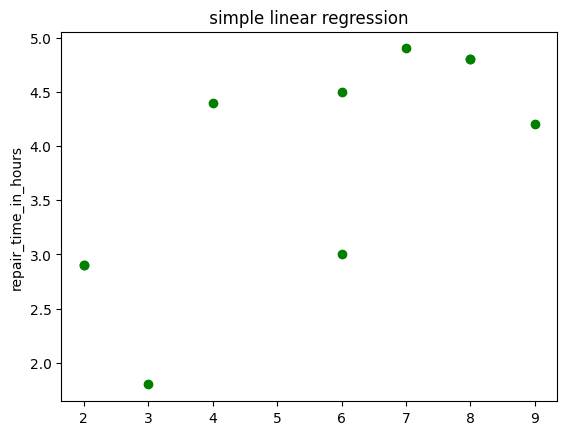

In [3]:
plt.scatter(tbl["months_since_last_service"], tbl["repair_time_in_hours"], color = "green")
plt.ylabel("repair_time_in_hours")
plt.title(" simple linear regression ")

In [4]:
from statsmodels.formula.api import ols
Reg = ols(formula="repair_time_in_hours ~ months_since_last_service", data=tbl)
Fit1 = Reg.fit()
print(Fit1.summary())

                             OLS Regression Results                             
Dep. Variable:     repair_time_in_hours   R-squared:                       0.534
Model:                              OLS   Adj. R-squared:                  0.476
Method:                   Least Squares   F-statistic:                     9.174
Date:                  Mon, 07 Apr 2025   Prob (F-statistic):             0.0163
Time:                          15:31:45   Log-Likelihood:                -10.602
No. Observations:                    10   AIC:                             25.20
Df Residuals:                         8   BIC:                             25.81
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
In

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [5]:
influence = Fit1.get_influence()
resid_student = influence.resid_studentized_external

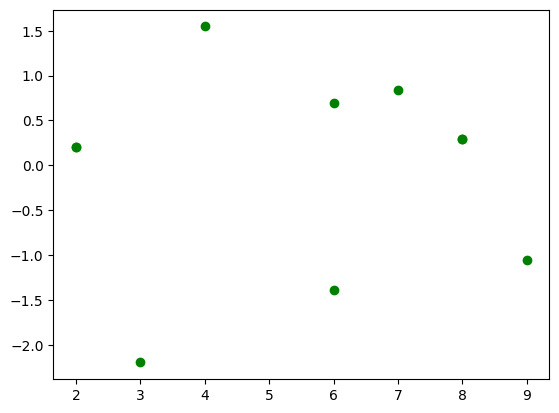

In [6]:
plt.figure()
plt.scatter(tbl['months_since_last_service'], resid_student, color="green")

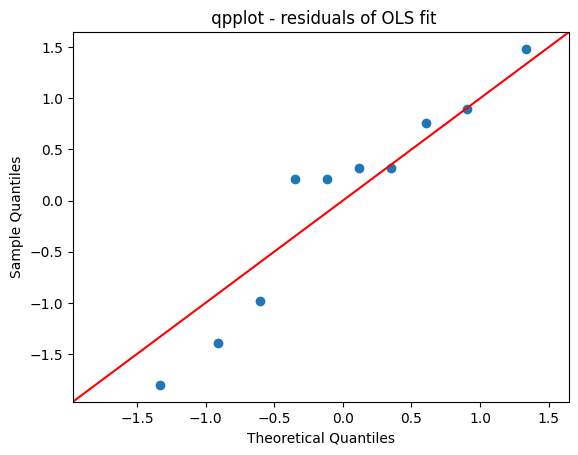

In [7]:
res = Fit1.resid # residuals
probplot = s.ProbPlot(res, stats.norm, fit=True)
fig = probplot.qqplot(line="45")
h = plt.title(" qpplot - residuals of OLS fit")
plt.show()

In [8]:
just_dummies = pd.get_dummies(tbl["type_of_repair"])
just_dummies

,electrical,mechanical
0,True,False
1,False,True
2,True,False
3,False,True
4,True,False
5,True,False
6,False,True
7,False,True
8,True,False
9,True,False


In [9]:
just_dummies = pd.get_dummies(tbl["type_of_repair"])
step_1 = pd.concat([tbl, just_dummies], axis=1)
step_1
step_1.drop(["type_of_repair", "mechanical"], inplace = True, axis = 1)

# to run the regression we want to get rid of the strings 'mechanical' and 'electrical'
# and we want to get rid of one dummy variable to avoid the dummy variable trap
# arbitrarily chose "mechanical", coefficients on "electrical" would show effect of "electrical"
# relatve to "mechanical"

In [10]:
step_1

,servicecall,months_since_last_service,repair_time_in_hours,electrical
0,1,2,2.9,True
1,2,6,3.0,False
2,3,8,4.8,True
3,4,3,1.8,False
4,5,2,2.9,True
5,6,7,4.9,True
6,7,9,4.2,False
7,8,8,4.8,False
8,9,4,4.4,True
9,10,6,4.5,True


In [11]:
result = sm.OLS(step_1["repair_time_in_hours"], s.add_constant(step_1[["months_since_last_service", "electrical"]])).fit()

print(result.summary())

AttributeError: module 'statsmodels.formula.api' has no attribute 'OLS'

In [12]:
tbl2 = pd.read_excel("/content/drive/MyDrive/data/dummy2.xlsx")
tbl2

,Employee,Salary,Gender,Experience
0,1,7.5,Male,6
1,2,8.6,Male,10
2,3,9.1,Male,12
3,4,10.3,Male,18
4,5,13.0,Male,30
5,6,6.2,Female,5
6,7,8.7,Female,13
7,8,9.4,Female,15
8,9,9.8,Female,21


Text(0.5, 1.0, 'Simple linear regression')

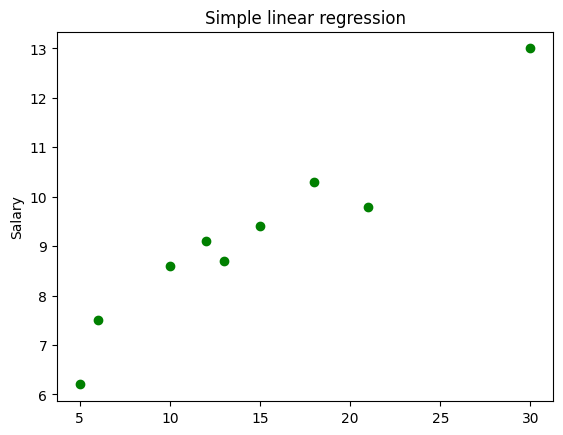

In [13]:
plt.scatter(tbl2["Experience"], tbl2["Salary"], color = "green")
plt.ylabel("Salary")
plt.title("Simple linear regression")

In [14]:
from statsmodels.formula.api import ols

In [15]:
Reg2 = ols(formula = "Salary ~ Experience", data = tbl2)
Fit2 = Reg2.fit()
print(Fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     87.61
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           3.30e-05
Time:                        15:32:04   Log-Likelihood:                -6.2491
No. Observations:                   9   AIC:                             16.50
Df Residuals:                       7   BIC:                             16.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8093      0.404     14.386      0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [16]:
influence = Fit2.get_influence()
resid_id = influence.resid_studentized_external

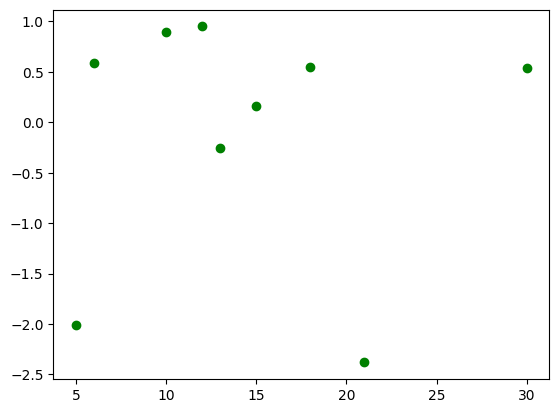

In [17]:
plt.figure()
plt.scatter(tbl2["Experience"], resid_id, color = "green")

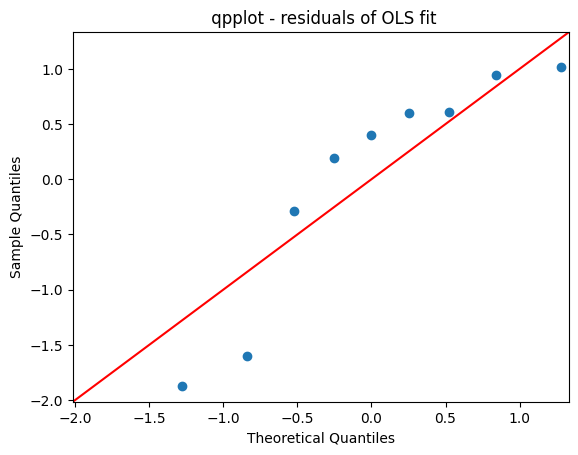

In [18]:
res = Fit2.resid # residuals
probplot = s.ProbPlot(res, stats.norm, fit=True)
fig = probplot.qqplot(line="45")
h = plt.title(" qpplot - residuals of OLS fit")
plt.show()

In [19]:
just_dummies2 = pd.get_dummies(tbl2['Gender'])
just_dummies2

,Female,Male
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
5,True,False
6,True,False
7,True,False
8,True,False


In [23]:
step_1 = pd.concat([tbl2, just_dummies2], axis=1)
step_1.drop(["Gender", "Male"], inplace=True, axis=1)
# to run the regression we want to get rid of the strings "male" and "female"
# and we want get rid of one dummy variable to avoid the dummy variable trap
# arbitrarily chase "male", coefficients on "female" would show effect of "female"
# relative to "male"

result = sm.OLS(step_1["Salary"], s.add_constant(step_1[["Female"]])).fit()
print(result.summary())

AttributeError: module 'statsmodels.formula.api' has no attribute 'OLS'

In [24]:
result = sm.OLS(step_1["Salary"], s.add_constant([["Female", "Experence"]])).fit()
print(result.summary())

AttributeError: module 'statsmodels.formula.api' has no attribute 'OLS'

In [25]:
# Replace the incorrect import alias
import statsmodels.api as sm  # This line is likely already in your imports
# ... (rest of your code)

# Instead of using statsmodels.formula.api, use statsmodels.api
result = sm.OLS(step_1["Salary"], sm.add_constant(step_1[["Female", "Experience"]])).fit()  # Notice the change here
print(result.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [27]:
# 1. Check the data type of both columns:
print(step_1['Female'].dtype)
print(step_1['Experience'].dtype)

# 2. Convert to numeric if necessary:
step_1['Female'] = pd.to_numeric(step_1['Female'], errors='coerce').astype(int) # Force to int after numeric conversion
step_1['Experience'] = pd.to_numeric(step_1['Experience'], errors='coerce').astype(int) # Force to int after numeric conversion

# 3. Re-run your regression:
result = sm.OLS(step_1["Salary"], sm.add_constant(step_1[["Female", "Experience"]])).fit()
print(result.summary())

bool
int64
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     111.6
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           1.80e-05
Time:                        16:22:09   Log-Likelihood:                -1.5752
No. Observations:                   9   AIC:                             9.150
Df Residuals:                       6   BIC:                             9.742
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2485      0.291     21.4

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [29]:
step_1 = pd.concat([tbl2, just_dummies2], axis=1)
step_1.drop(["Gender", "Female"], inplace=True, axis=1)

step_1['Male'] = pd.to_numeric(step_1['Male'], errors='coerce').astype(int)


result = sm.OLS(step_1["Salary"], s.add_constant(step_1[["Male"]])).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.8426
Date:                Mon, 07 Apr 2025   Prob (F-statistic):              0.389
Time:                        16:47:44   Log-Likelihood:                -17.455
No. Observations:                   9   AIC:                             38.91
Df Residuals:                       7   BIC:                             39.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5250      0.954      8.935      0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)
